# Gradient Clipping in Keras

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol> <ol>* Define clipvalue while defining the optimizer</ol></ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [3]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [4]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [5]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [6]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [7]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [8]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [9]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

## 5. Compiling the model

In [10]:
# defining the adam optimizer and setting the learning rate as 10^-5 and adding clip value to clip the gradients
adam = Adam(lr=1e-5, clipvalue=1)

In [11]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model

In [12]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 14s 1s/step - loss: 0.6716 - accuracy: 0.6057 - val_loss: 0.6738 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 5s 363ms/step - loss: 0.6477 - accuracy: 0.6403 - val_loss: 0.6430 - val_accuracy: 0.6176
Epoch 3/100
13/13 [==============================] - 4s 312ms/step - loss: 0.6307 - accuracy: 0.6391 - val_loss: 0.6282 - val_accuracy: 0.6572
Epoch 4/100
13/13 [==============================] - 4s 317ms/step - loss: 0.6204 - accuracy: 0.6616 - val_loss: 0.6208 - val_accuracy: 0.6714
Epoch 5/100
13/13 [==============================] - 4s 313ms/step - loss: 0.6124 - accuracy: 0.6871 - val_loss: 0.6312 - val_accuracy: 0.6402
Epoch 6/100
13/13 [==============================] - 5s 348ms/step - loss: 0.6052 - accuracy: 0.6841 - val_loss: 0.6099 - val_accuracy: 0.6643
Epoch 7/100
13/13 [==============================] - 4s 326ms/step - loss: 0.5978 - accuracy: 0.6956 - val_loss: 0.6052 - val_accuracy: 0.6870
E

Epoch 58/100
13/13 [==============================] - 3s 266ms/step - loss: 0.4288 - accuracy: 0.8499 - val_loss: 0.5471 - val_accuracy: 0.7280
Epoch 59/100
13/13 [==============================] - 4s 272ms/step - loss: 0.4286 - accuracy: 0.8481 - val_loss: 0.5414 - val_accuracy: 0.7125
Epoch 60/100
13/13 [==============================] - 3s 263ms/step - loss: 0.4236 - accuracy: 0.8542 - val_loss: 0.5590 - val_accuracy: 0.7068
Epoch 61/100
13/13 [==============================] - 3s 255ms/step - loss: 0.4200 - accuracy: 0.8554 - val_loss: 0.5401 - val_accuracy: 0.7252
Epoch 62/100
13/13 [==============================] - 3s 260ms/step - loss: 0.4231 - accuracy: 0.8542 - val_loss: 0.5392 - val_accuracy: 0.7139
Epoch 63/100
13/13 [==============================] - 3s 256ms/step - loss: 0.4205 - accuracy: 0.8505 - val_loss: 0.5383 - val_accuracy: 0.7210
Epoch 64/100
13/13 [==============================] - 3s 251ms/step - loss: 0.4178 - accuracy: 0.8499 - val_loss: 0.5426 - val_accuracy:

## 7. Evaluating model performance 

In [13]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on validation set: 0.726628895184136


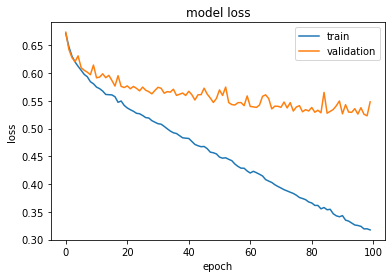

In [14]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()